<a href="https://colab.research.google.com/github/abdelmonem808/Artificial-Intelligence-and-Machine-Vision/blob/main/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/model_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
!pip install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import pytesseract as pt
import random
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet


In [109]:
from glob import glob
from skimage import io
from shutil import copy
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [10]:
#!rm -r /content/Artificial-Intelligence-and-Machine-Vision

In [11]:
!git clone https://github.com/abdelmonem808/Artificial-Intelligence-and-Machine-Vision
path = '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images'

%cd urldata #go to the directory where git clone says *Cloning into*

for subdir, dirs, files in os.walk(path):
  print(files)

fatal: destination path 'Artificial-Intelligence-and-Machine-Vision' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'urldata #go to the directory where git clone says *Cloning into*'
/content
['Cars42.png', 'Cars34.xml', 'Cars38.png', 'Cars28.png', 'Cars0.png', 'Cars31.xml', 'Cars37.png', 'Cars22.xml', 'Cars49.png', 'Cars37.xml', 'Cars36.xml', 'Cars20.png', 'Cars17.png', 'Cars33.png', 'Cars20.xml', 'Cars0.xml', 'Cars23.xml', 'Cars12.png', 'Cars19.png', 'Cars49.xml', 'Cars2.xml', 'Cars31.png', 'Cars47.png', 'Cars24.png', 'Cars18.png', 'Cars43.png', 'Cars33.xml', 'Cars10.xml', 'Cars10.png', 'Cars16.xml', 'Cars13.png', 'Cars12.xml', 'Cars34.png', 'Cars8.png', 'Cars4.png', 'Cars25.png', 'Cars39.xml', 'Cars14.xml', 'Cars1.png', 'Cars41.xml', 'Cars3.xml', 'Cars40.png', 'Cars5.png', 'Cars15.png', 'Cars38.xml', 'Cars19.xml', 'Cars47.xml', 'Cars14.png', 'Cars27.png', 'Cars4.xml', 'Cars5.xml', 'Cars6.png', 'Cars17.xml', 'Cars26.xml', 'Cars39.png', 'Cars30.png'

In [12]:
path = glob('/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/*.xml')
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:

    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

In [13]:
df = pd.DataFrame(labels_dict)
df.to_csv('../labels.csv',index=False)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/Artificial-Intelligence-and-Machine-V...,147,260,181,206
1,/content/Artificial-Intelligence-and-Machine-V...,286,400,173,211
2,/content/Artificial-Intelligence-and-Machine-V...,207,260,104,116
3,/content/Artificial-Intelligence-and-Machine-V...,146,246,114,163
4,/content/Artificial-Intelligence-and-Machine-V...,203,285,193,229


In [14]:
filename = df['filepath'][0]
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images',filename_image)
    return filepath_image
getFilename(filename)

'/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars34.png'

In [15]:
image_path = list(df['filepath'].apply(getFilename))
image_path[:10]#random check

['/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars34.png',
 '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars31.png',
 '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars22.png',
 '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars37.png',
 '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars36.png',
 '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars20.png',
 '/content/Artificial-Intelligence-and-Machine-Visio


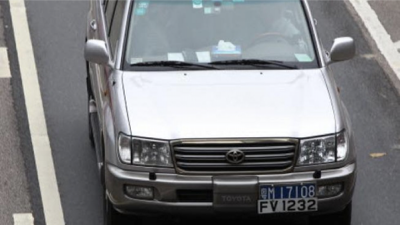

In [16]:
file_path = image_path[47] #path of our image
img = cv2.imread(file_path) #read the image
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure with bounding box')
fig.add_shape(type='rect',x0=143, x1=211, y0=171, y1=171, xref='x', yref='y',line_color='cyan')

In [17]:
#Targeting all our values in array selecting all columns
labels = df.iloc[:,1:].values
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # Prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # Normalized output
    # Append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [18]:
# Convert data to array
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [19]:
# Split the data into training and testing set using sklearn.
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40, 224, 224, 3), (10, 224, 224, 3), (40, 4), (10, 4))

In [20]:
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False, input_tensor=Input(shape=(224,224,3)))
# ---------------------
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)


# ---------- model
model = Model(inputs=inception_resnet.input,outputs=headmodel)

In [21]:
# Complie model
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [113]:
tfb = TensorBoard('object_detection')
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=180,
                    validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/180
4/4 [==============================] - 101s 14s/step - loss: 0.0014 - val_loss: 0.0589
Epoch 2/180
4/4 [==============================] - 51s 13s/step - loss: 3.6357e-04 - val_loss: 0.0601
Epoch 3/180
4/4 [==============================] - 55s 14s/step - loss: 0.0010 - val_loss: 0.0606
Epoch 4/180
4/4 [==============================] - 51s 13s/step - loss: 7.2084e-04 - val_loss: 0.0584
Epoch 5/180
4/4 [==============================] - 54s 14s/step - loss: 9.7603e-04 - val_loss: 0.0505
Epoch 6/180
4/4 [==============================] - 51s 13s/step - loss: 5.0859e-04 - val_loss: 0.0476
Epoch 7/180
4/4 [==============================] - 51s 13s/step - loss: 8.4429e-04 - val_loss: 0.0434
Epoch 8/180
4/4 [==============================] - 53s 13s/step - loss: 6.1974e-04 - val_loss: 0.0471
Epoch 9/180
4/4 [==============================] - 52s 13s/step - loss: 0.0011 - val_loss: 0.0547
Epoch 10/180
4/4 [==============================] - 53s 14s/step - loss: 4.9203e-04 - val_los

In [114]:
model.save('./Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/object_detection.h5')

In [115]:
# Load model
model = tf.keras.models.load_model('./Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/object_detection.h5')
print('Model loaded Sucessfully')

Model loaded Sucessfully


In [116]:
path = '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars0.png'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # Convert into array and get the normalized output

# Size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 268
Width of the image = 500



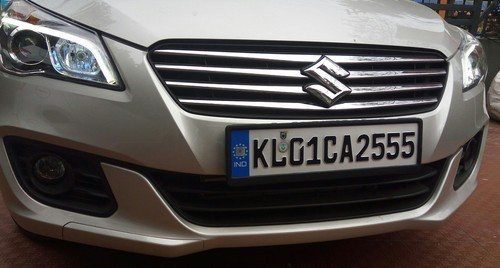

In [117]:
fig = px.imshow(image)
fig.update_layout(width=700, height=500,  margin=dict(l=10, r=10, b=10, t=10), xaxis_title='Figure 13 - TEST Image')

In [118]:
image_arr_224.shape

(224, 224, 3)

In [119]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [120]:
# Make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 5s 5s/step


array([[0.4495086 , 0.84038436, 0.47381416, 0.6501272 ]], dtype=float32)

In [121]:
# Denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[224.75430369, 420.19218206, 126.98219478, 174.23408222]])

In [122]:
coords = coords.astype(np.int32)
coords

array([[224, 420, 126, 174]], dtype=int32)

In [123]:
# Draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)

(224, 126) (420, 174)



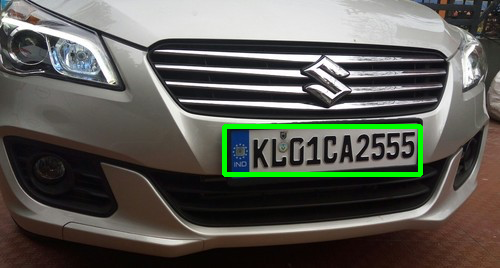

In [124]:
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
fig = px.imshow(image)
fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10))

1/1 [==============================] - 1s 624ms/step
(224, 126) (420, 174)



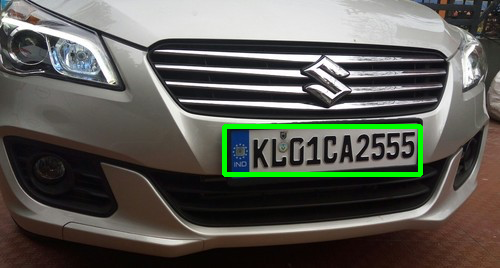

In [125]:
# Create pipeline
path = '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars0.png'
def object_detection(path):
    
    # Read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    
    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert to array & normalized
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    
    # Make predictions
    coords = model.predict(test_arr)
    
    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    
    # Draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

image, cods = object_detection(path)

fig = px.imshow(image)
fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 14')


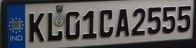

In [126]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]
fig = px.imshow(roi)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 15 Cropped image')

In [127]:
# extract text from image
text = pt.image_to_string(roi)
print(text)

FKEG10A2555

